

# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Import library required and a dataset of TMDB Movie list with information such as revenue, budget, cast and so on. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


## Data Cleaning
Deleting some columns with non-quantative data or lots of missing values

In [7]:
df.drop(['imdb_id','original_title','homepage', 'overview', 'production_companies', 'tagline', 'keywords', 'cast'], axis=1, inplace=True)

In [8]:
df['gross_adj'] = df.revenue_adj - df.budget_adj

In [9]:
df.shape

(10866, 14)

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,3.381332e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,1.252151e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,1.292617e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id              10866 non-null int64
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
gross_adj       10866 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Do more profitable movies receive higher votes? 

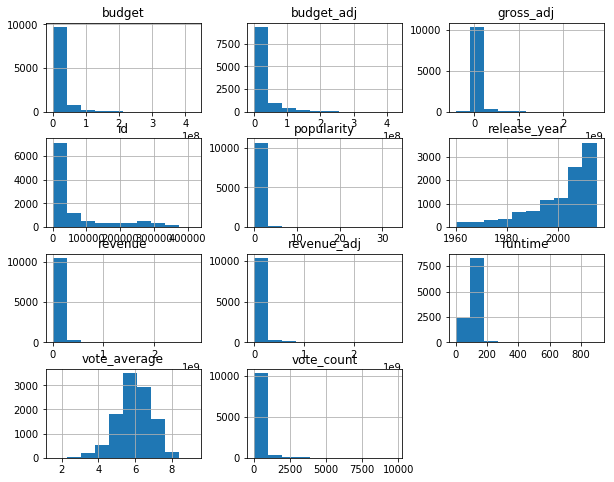

In [12]:
df.hist(figsize=(10,8));

In [13]:
#divide into two groups based on the mean of the gross_adj which is revenue - budget.

high_gross = df.gross_adj >= df.gross_adj.mean()
low_gross = df.gross_adj < df.gross_adj.mean()

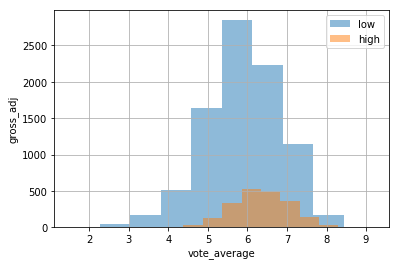

In [24]:
#create histogram to show the average vote of the each group. 

df.vote_average[low_gross].hist(alpha=0.5, label='low');
df.vote_average[high_gross].hist(alpha=0.5, label='high');
plt.legend();
plt.xlabel('vote_average');
plt.ylabel('gross_adj');

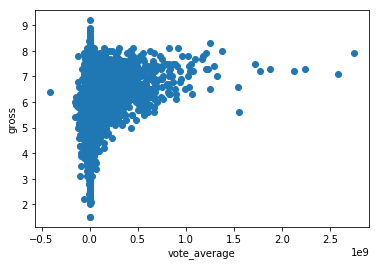

In [16]:
#observe correlation between the averegage vote and gross revenue
plt.scatter(df.gross_adj,df.vote_average);
plt.xlabel('vote_average');
plt.ylabel('gross');

### Correlation between the amount of investment (budget) and return (revenue)

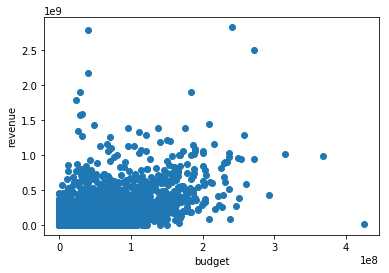

In [21]:
plt.scatter(df.budget_adj, df.revenue_adj);
plt.xlabel('budget');
plt.ylabel('revenue');

<a id='conclusions'></a>
## Conclusions
1. There's no strong correlation between the money made and the average rating of the movies. The vote averages are normally distributed for both high and low gross revenue groups. There's a large number of movies that earned no profit with various ratings. 

2. There's a weak positive correlation observed in the graph of budget and revenue.